In [1]:
import numpy as np
from scipy import io
from utils import viz_img
import yaml
from random import shuffle

In [2]:
path_img = "./data/indian_pines/Indian_pines_corrected.mat"
path_gt = "./data/indian_pines/Indian_pines_gt.mat"
path_data = "./data/indian_pines/data.yaml"
file = io.loadmat(path_img)
img = file["indian_pines_corrected"]

with open(path_data, 'r') as stream:
    try:
        file = yaml.safe_load(stream)
    except yaml.YAMLError as e:
        print(e)
labels = file['LABELS']

file = io.loadmat(path_gt)
gt = file["indian_pines_gt"]
print(np.max(gt))

16


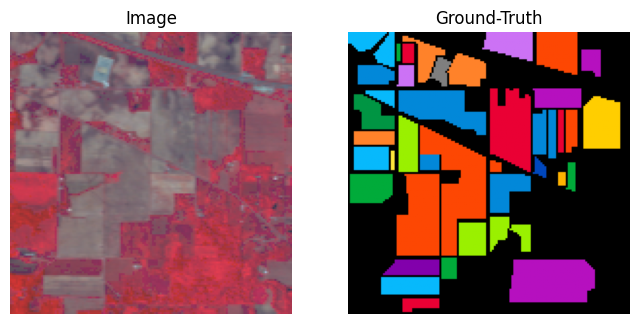

In [3]:
# Aviris Sensor
RGB_index = (43,21,11)

viz_img(img, gt, labels, RGB_index)

In [4]:
from datasets import IndianPinesDataset
from torch.utils.data import DataLoader

dataset = IndianPinesDataset(img, labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [5]:
print(len(dataset))

48


In [6]:
loader = DataLoader(dataset)

sample = next(iter(loader))

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
a = np.array([[3,1],[4,9]])
x, y = np.where(a>3)
print(x)

[1 1]
